In [1]:
import pandas as pd
import numpy as np
import os
import warnings
warnings.filterwarnings("ignore")
pd.set_option('max_columns',None)


In [2]:
swm = pd.read_csv('swm_infrastructure.csv')
ses = pd.read_csv('ses_predictors_v2.csv')
lu = pd.read_csv('landuse_predictors_v4.csv')
df311 = pd.read_csv('311_cleaned.csv')

## Data exploration

In [3]:
swm.head()

,Unnamed: 0,cd,boro,date,year,month,REFUSETONSCOLLECTED,PAPERTONSCOLLECTED,MGPTONSCOLLECTED,RESORGANICSTONS,fs_openhours,fs_open,trs_permits,paper_baskets,mgp_baskets,total_number_of_households,hh_compost_num,hh_compost_percent,shape_area,wfr_avg_recycling,wfr_avg_refuse,wfr_avg_bulk,bigbelly,seasonal_wire_litter_basket,highend_basket,publicspacereceptacle,wire_basket,total_litter_baskets
0,0,BK01,BK,2016-11-01,2016,11,5250.4,527.8,402.8,16.9,333.25,6.0,14.0,9.0,9.0,92610,9745,0.105226,0.001307,1.0,3.0,3.0,1.0,0.0,2.0,1.0,10.0,14.0
1,1,BK01,BK,2016-12-01,2016,12,5409.5,726.3,501.0,11.7,333.25,6.0,14.0,9.0,9.0,92610,9745,0.105226,0.001307,1.0,3.0,3.0,1.0,0.0,2.0,1.0,10.0,14.0
2,2,BK01,BK,2017-01-01,2017,1,5189.9,589.1,455.2,14.9,333.25,6.0,14.0,9.0,9.0,92610,9745,0.105226,0.001307,1.0,3.0,3.0,1.0,0.0,2.0,1.0,10.0,14.0
3,3,BK01,BK,2017-02-01,2017,2,4705.4,505.6,395.8,10.5,333.25,6.0,14.0,9.0,9.0,92610,9745,0.105226,0.001307,1.0,3.0,3.0,1.0,0.0,2.0,1.0,10.0,14.0
4,4,BK01,BK,2017-03-01,2017,3,5476.7,563.0,453.3,10.6,333.25,6.0,14.0,9.0,9.0,92610,9745,0.105226,0.001307,1.0,3.0,3.0,1.0,0.0,2.0,1.0,10.0,14.0


In [4]:
swm.shape #checking that lengths of all the dfs align

(3540, 28)

In [5]:
ses.head()

,Unnamed: 0,Unnamed: 0.1,borocd,pct_bach_deg,over65_rate,under18_rate,pct_white_nh,poverty_rate,pct_hh_rent_burd,mean_commute,unemployment,crime_per_1000,pop_density,month,borough_no,cd,borough_code,community_district
0,0,0,201,11.3,9.0,29.7,2.1,32.3,49.4,42.5,6.4,21.7,42230.049029,2016-11-01,2,1,BX,BX01
1,1,1,202,14.2,9.2,27.5,1.9,32.3,53.8,44.9,6.4,12.3,23547.039187,2016-11-01,2,2,BX,BX02
2,2,2,203,14.1,9.2,29.1,1.2,31.4,48.0,43.9,6.6,13.6,49616.354945,2016-11-01,2,3,BX,BX03
3,3,3,206,12.6,9.6,28.3,6.1,31.4,55.1,44.4,8.4,12.0,54409.272313,2016-11-01,2,6,BX,BX06
4,4,4,204,15.8,9.7,27.7,1.9,34.7,54.0,41.9,6.4,14.6,73513.072409,2016-11-01,2,4,BX,BX04


In [6]:
ses.shape  #checking that lengths of all the dfs align

(3540, 18)

In [7]:
lu.head()

,month,community_district,numbldgs,unitstotal,asland_sqft,pct_clean_strts,pct_lot_area_open_space,pct_lot_area_public_facility_institution,pct_lot_area_res_1_2_family_bldg,pct_lot_area_res_multifamily_walkup,restaurant,business
0,11/1/16,MN01,1760,55988,79.282161,100.0,4.35,31.68,0.17,0.63,3295,683
1,11/1/16,MN02,5375,72165,100.324753,98.7,3.55,9.63,4.47,10.26,1271,1013
2,11/1/16,MN03,4708,94059,58.236802,93.4,14.95,11.15,0.32,8.66,580,947
3,11/1/16,MN04,3923,100090,105.402387,100.0,2.81,11.75,0.88,7.68,964,1014
4,11/1/16,MN05,3190,95425,516.066825,100.0,1.59,6.49,0.09,0.67,270,2083


In [8]:
lu.shape

(3540, 12)

In [9]:
df311.head()

,Unnamed: 0,CD,Year_Month,Year,Month,Count
0,0,BK01,2016-11,2016,11,50
1,1,BK01,2016-12,2016,12,36
2,2,BK01,2017-01,2017,1,51
3,3,BK01,2017-02,2017,2,61
4,4,BK01,2017-03,2017,3,67


In [10]:
df311.shape

(3523, 6)

## Data cleaning

### swm

In [11]:
swm.columns

Index(['Unnamed: 0', 'cd', 'boro', 'date', 'year', 'month',
       'REFUSETONSCOLLECTED', 'PAPERTONSCOLLECTED', 'MGPTONSCOLLECTED',
       'RESORGANICSTONS', 'fs_openhours', 'fs_open', 'trs_permits',
       'paper_baskets', 'mgp_baskets', 'total_number_of_households',
       'hh_compost_num', 'hh_compost_percent', 'shape_area',
       'wfr_avg_recycling', 'wfr_avg_refuse', 'wfr_avg_bulk', 'bigbelly',
       'seasonal_wire_litter_basket', 'highend_basket',
       'publicspacereceptacle', 'wire_basket', 'total_litter_baskets'],
      dtype='object')

In [12]:
swm['Year_Month'] = pd.to_datetime(swm['date']).dt.to_period('M')
swm = swm.drop(['Unnamed: 0','boro','date'],axis=1)

In [13]:
swm['Year_Month'].unique()

<PeriodArray>
['2016-11', '2016-12', '2017-01', '2017-02', '2017-03', '2017-04', '2017-05',
 '2017-06', '2017-07', '2017-08', '2017-09', '2017-10', '2017-11', '2017-12',
 '2018-01', '2018-02', '2018-03', '2018-04', '2018-05', '2018-06', '2018-07',
 '2018-08', '2018-09', '2018-10', '2018-11', '2018-12', '2019-01', '2019-02',
 '2019-03', '2019-04', '2019-05', '2019-06', '2019-07', '2019-08', '2019-09',
 '2019-10', '2019-11', '2019-12', '2020-01', '2020-02', '2020-03', '2020-04',
 '2020-05', '2020-06', '2020-07', '2020-08', '2020-09', '2020-10', '2020-11',
 '2020-12', '2021-01', '2021-02', '2021-03', '2021-04', '2021-05', '2021-06',
 '2021-07', '2021-08', '2021-09', '2021-10']
Length: 60, dtype: period[M]

In [14]:
swm.dtypes

cd                                object
year                               int64
month                              int64
REFUSETONSCOLLECTED              float64
PAPERTONSCOLLECTED               float64
MGPTONSCOLLECTED                 float64
RESORGANICSTONS                  float64
fs_openhours                     float64
fs_open                          float64
trs_permits                      float64
paper_baskets                    float64
mgp_baskets                      float64
total_number_of_households         int64
hh_compost_num                     int64
hh_compost_percent               float64
shape_area                       float64
wfr_avg_recycling                float64
wfr_avg_refuse                   float64
wfr_avg_bulk                     float64
bigbelly                         float64
seasonal_wire_litter_basket      float64
highend_basket                   float64
publicspacereceptacle            float64
wire_basket                      float64
total_litter_bas

In [15]:
swm.rename({'cd':'CD','year':'Year','month':'Month'},inplace=True,axis=1)
swm.head()

,CD,Year,Month,REFUSETONSCOLLECTED,PAPERTONSCOLLECTED,MGPTONSCOLLECTED,RESORGANICSTONS,fs_openhours,fs_open,trs_permits,paper_baskets,mgp_baskets,total_number_of_households,hh_compost_num,hh_compost_percent,shape_area,wfr_avg_recycling,wfr_avg_refuse,wfr_avg_bulk,bigbelly,seasonal_wire_litter_basket,highend_basket,publicspacereceptacle,wire_basket,total_litter_baskets,Year_Month
0,BK01,2016,11,5250.4,527.8,402.8,16.9,333.25,6.0,14.0,9.0,9.0,92610,9745,0.105226,0.001307,1.0,3.0,3.0,1.0,0.0,2.0,1.0,10.0,14.0,2016-11
1,BK01,2016,12,5409.5,726.3,501.0,11.7,333.25,6.0,14.0,9.0,9.0,92610,9745,0.105226,0.001307,1.0,3.0,3.0,1.0,0.0,2.0,1.0,10.0,14.0,2016-12
2,BK01,2017,1,5189.9,589.1,455.2,14.9,333.25,6.0,14.0,9.0,9.0,92610,9745,0.105226,0.001307,1.0,3.0,3.0,1.0,0.0,2.0,1.0,10.0,14.0,2017-01
3,BK01,2017,2,4705.4,505.6,395.8,10.5,333.25,6.0,14.0,9.0,9.0,92610,9745,0.105226,0.001307,1.0,3.0,3.0,1.0,0.0,2.0,1.0,10.0,14.0,2017-02
4,BK01,2017,3,5476.7,563.0,453.3,10.6,333.25,6.0,14.0,9.0,9.0,92610,9745,0.105226,0.001307,1.0,3.0,3.0,1.0,0.0,2.0,1.0,10.0,14.0,2017-03


### ses

In [16]:
ses['Year_Month'] = pd.to_datetime(ses['month']).dt.to_period('M')
ses['Year'] = ses['Year_Month'].dt.year
ses['Month'] = ses['Year_Month'].dt.month

In [17]:
ses = ses.drop(['Unnamed: 0','Unnamed: 0.1','borocd','borough_no','cd','borough_code'],axis=1)

In [18]:
ses.rename({'community_district':'CD'},inplace=True,axis=1)
ses.head()

,pct_bach_deg,over65_rate,under18_rate,pct_white_nh,poverty_rate,pct_hh_rent_burd,mean_commute,unemployment,crime_per_1000,pop_density,month,CD,Year_Month,Year,Month
0,11.3,9.0,29.7,2.1,32.3,49.4,42.5,6.4,21.7,42230.049029,2016-11-01,BX01,2016-11,2016,11
1,14.2,9.2,27.5,1.9,32.3,53.8,44.9,6.4,12.3,23547.039187,2016-11-01,BX02,2016-11,2016,11
2,14.1,9.2,29.1,1.2,31.4,48.0,43.9,6.6,13.6,49616.354945,2016-11-01,BX03,2016-11,2016,11
3,12.6,9.6,28.3,6.1,31.4,55.1,44.4,8.4,12.0,54409.272313,2016-11-01,BX06,2016-11,2016,11
4,15.8,9.7,27.7,1.9,34.7,54.0,41.9,6.4,14.6,73513.072409,2016-11-01,BX04,2016-11,2016,11


### lu

In [19]:
# extracting date & month 
lu['month'] = pd.to_datetime(lu['month'])
lu['Year'] = lu['month'].dt.year
lu['Month'] = lu['month'].dt.month 

In [20]:
lu['Year_Month'] = pd.to_datetime(ses['month']).dt.to_period('M')

In [21]:
lu.rename({'community_district':'CD'},inplace=True,axis=1)
lu.head()

,month,CD,numbldgs,unitstotal,asland_sqft,pct_clean_strts,pct_lot_area_open_space,pct_lot_area_public_facility_institution,pct_lot_area_res_1_2_family_bldg,pct_lot_area_res_multifamily_walkup,restaurant,business,Year,Month,Year_Month
0,2016-11-01,MN01,1760,55988,79.282161,100.0,4.35,31.68,0.17,0.63,3295,683,2016,11,2016-11
1,2016-11-01,MN02,5375,72165,100.324753,98.7,3.55,9.63,4.47,10.26,1271,1013,2016,11,2016-11
2,2016-11-01,MN03,4708,94059,58.236802,93.4,14.95,11.15,0.32,8.66,580,947,2016,11,2016-11
3,2016-11-01,MN04,3923,100090,105.402387,100.0,2.81,11.75,0.88,7.68,964,1014,2016,11,2016-11
4,2016-11-01,MN05,3190,95425,516.066825,100.0,1.59,6.49,0.09,0.67,270,2083,2016,11,2016-11


### 311

In [22]:
df311 = pd.read_csv('311_cleaned.csv', index_col=0)
df311.head()

,CD,Year_Month,Year,Month,Count
0,BK01,2016-11,2016,11,50
1,BK01,2016-12,2016,12,36
2,BK01,2017-01,2017,1,51
3,BK01,2017-02,2017,2,61
4,BK01,2017-03,2017,3,67


In [23]:
df311.rename({'Count':'Count311'},axis=1,inplace=True)
df311.head()

,CD,Year_Month,Year,Month,Count311
0,BK01,2016-11,2016,11,50
1,BK01,2016-12,2016,12,36
2,BK01,2017-01,2017,1,51
3,BK01,2017-02,2017,2,61
4,BK01,2017-03,2017,3,67


In [24]:
df311.shape

(3523, 5)

In [25]:
df311['Year_Month'].nunique()
df311.shape # df311 has different length than the other datasets 

(3523, 5)

In [26]:
# which CDs have incomplete data? 
size = pd.DataFrame(df311.groupby(by='CD').size())
size[size[0] < 60]

,0
CD,
BK02,59
BK07,59
BX03,59
BX04,59
BX05,59
BX08,59
BX11,59
MN05,59
MN06,59


In [27]:
# which months have incomplete data? 
size = pd.DataFrame(df311.groupby(by='Year_Month').size())
size[size[0] < 59]

,0
Year_Month,
2019-07,42


In [28]:
df311 = df311[df311['Year_Month'] != '2019-07']
df311.shape

# 42 rows lost by removing 2021-10.

# not certain if there are exogenic shocks that affected CDs differentially during this month
# such that some CDs did not have make any 311 reports at all, despite
# consistently having done so for all previous months. 
# so a decision was made to remove this month entirely. 

(3481, 5)

## MERGING: The Merge. 

In [29]:
merge1 = swm.merge(df311, on=['Year', 'Month', 'CD'])
merge1.shape

(3481, 28)

In [30]:
merge1.head()

,CD,Year,Month,REFUSETONSCOLLECTED,PAPERTONSCOLLECTED,MGPTONSCOLLECTED,RESORGANICSTONS,fs_openhours,fs_open,trs_permits,paper_baskets,mgp_baskets,total_number_of_households,hh_compost_num,hh_compost_percent,shape_area,wfr_avg_recycling,wfr_avg_refuse,wfr_avg_bulk,bigbelly,seasonal_wire_litter_basket,highend_basket,publicspacereceptacle,wire_basket,total_litter_baskets,Year_Month_x,Year_Month_y,Count311
0,BK01,2016,11,5250.4,527.8,402.8,16.9,333.25,6.0,14.0,9.0,9.0,92610,9745,0.105226,0.001307,1.0,3.0,3.0,1.0,0.0,2.0,1.0,10.0,14.0,2016-11,2016-11,50
1,BK01,2016,12,5409.5,726.3,501.0,11.7,333.25,6.0,14.0,9.0,9.0,92610,9745,0.105226,0.001307,1.0,3.0,3.0,1.0,0.0,2.0,1.0,10.0,14.0,2016-12,2016-12,36
2,BK01,2017,1,5189.9,589.1,455.2,14.9,333.25,6.0,14.0,9.0,9.0,92610,9745,0.105226,0.001307,1.0,3.0,3.0,1.0,0.0,2.0,1.0,10.0,14.0,2017-01,2017-01,51
3,BK01,2017,2,4705.4,505.6,395.8,10.5,333.25,6.0,14.0,9.0,9.0,92610,9745,0.105226,0.001307,1.0,3.0,3.0,1.0,0.0,2.0,1.0,10.0,14.0,2017-02,2017-02,61
4,BK01,2017,3,5476.7,563.0,453.3,10.6,333.25,6.0,14.0,9.0,9.0,92610,9745,0.105226,0.001307,1.0,3.0,3.0,1.0,0.0,2.0,1.0,10.0,14.0,2017-03,2017-03,67


In [31]:
merge2 = pd.merge(merge1, ses, on=['Year', 'Month', 'CD'])
merge2.shape

(3481, 40)

In [32]:
merge3 = merge2.merge(lu, on=['Year', 'Month', 'CD'], indicator=True, how='left')
merge3.shape

(3481, 53)

In [33]:
len(merge3[merge3['_merge']!='both']) # check that the merge was all good

0

In [34]:
merge3.columns

Index(['CD', 'Year', 'Month', 'REFUSETONSCOLLECTED', 'PAPERTONSCOLLECTED',
       'MGPTONSCOLLECTED', 'RESORGANICSTONS', 'fs_openhours', 'fs_open',
       'trs_permits', 'paper_baskets', 'mgp_baskets',
       'total_number_of_households', 'hh_compost_num', 'hh_compost_percent',
       'shape_area', 'wfr_avg_recycling', 'wfr_avg_refuse', 'wfr_avg_bulk',
       'bigbelly', 'seasonal_wire_litter_basket', 'highend_basket',
       'publicspacereceptacle', 'wire_basket', 'total_litter_baskets',
       'Year_Month_x', 'Year_Month_y', 'Count311', 'pct_bach_deg',
       'over65_rate', 'under18_rate', 'pct_white_nh', 'poverty_rate',
       'pct_hh_rent_burd', 'mean_commute', 'unemployment', 'crime_per_1000',
       'pop_density', 'month_x', 'Year_Month_x', 'month_y', 'numbldgs',
       'unitstotal', 'asland_sqft', 'pct_clean_strts',
       'pct_lot_area_open_space', 'pct_lot_area_public_facility_institution',
       'pct_lot_area_res_1_2_family_bldg',
       'pct_lot_area_res_multifamily_walkup'

In [35]:
merge3[['Year', 'Month', 'Year_Month_x', 'Year_Month_y']]

,Year,Month,Year_Month_x,Year_Month_x,Year_Month_y,Year_Month_y
0,2016,11,2016-11,2016-11,2016-11,2016-11
1,2016,12,2016-12,2016-12,2016-12,2016-12
2,2017,1,2017-01,2017-01,2017-01,2017-01
3,2017,2,2017-02,2017-02,2017-02,2017-02
4,2017,3,2017-03,2017-03,2017-03,2017-03
...,...,...,...,...,...,...
3476,2021,6,2021-06,2021-06,2021-06,2021-06
3477,2021,7,2021-07,2021-07,2021-07,2021-07
3478,2021,8,2021-08,2021-08,2021-08,2021-08
3479,2021,9,2021-09,2021-09,2021-09,2021-09


In [36]:
merge_final = merge3.drop(['Year_Month_x', 'Year_Month_y',
                           'month_x', 'month_y',
                           '_merge'],axis =1)

In [37]:
merge_final.columns

Index(['CD', 'Year', 'Month', 'REFUSETONSCOLLECTED', 'PAPERTONSCOLLECTED',
       'MGPTONSCOLLECTED', 'RESORGANICSTONS', 'fs_openhours', 'fs_open',
       'trs_permits', 'paper_baskets', 'mgp_baskets',
       'total_number_of_households', 'hh_compost_num', 'hh_compost_percent',
       'shape_area', 'wfr_avg_recycling', 'wfr_avg_refuse', 'wfr_avg_bulk',
       'bigbelly', 'seasonal_wire_litter_basket', 'highend_basket',
       'publicspacereceptacle', 'wire_basket', 'total_litter_baskets',
       'Count311', 'pct_bach_deg', 'over65_rate', 'under18_rate',
       'pct_white_nh', 'poverty_rate', 'pct_hh_rent_burd', 'mean_commute',
       'unemployment', 'crime_per_1000', 'pop_density', 'numbldgs',
       'unitstotal', 'asland_sqft', 'pct_clean_strts',
       'pct_lot_area_open_space', 'pct_lot_area_public_facility_institution',
       'pct_lot_area_res_1_2_family_bldg',
       'pct_lot_area_res_multifamily_walkup', 'restaurant', 'business'],
      dtype='object')

In [38]:
# first_column = merge_final.pop('Year_Month_y')
# merge_final.insert(0, 'Year_Month', first_column)

In [39]:
merge_final.head()

,CD,Year,Month,REFUSETONSCOLLECTED,PAPERTONSCOLLECTED,MGPTONSCOLLECTED,RESORGANICSTONS,fs_openhours,fs_open,trs_permits,paper_baskets,mgp_baskets,total_number_of_households,hh_compost_num,hh_compost_percent,shape_area,wfr_avg_recycling,wfr_avg_refuse,wfr_avg_bulk,bigbelly,seasonal_wire_litter_basket,highend_basket,publicspacereceptacle,wire_basket,total_litter_baskets,Count311,pct_bach_deg,over65_rate,under18_rate,pct_white_nh,poverty_rate,pct_hh_rent_burd,mean_commute,unemployment,crime_per_1000,pop_density,numbldgs,unitstotal,asland_sqft,pct_clean_strts,pct_lot_area_open_space,pct_lot_area_public_facility_institution,pct_lot_area_res_1_2_family_bldg,pct_lot_area_res_multifamily_walkup,restaurant,business
0,BK01,2016,11,5250.4,527.8,402.8,16.9,333.25,6.0,14.0,9.0,9.0,92610,9745,0.105226,0.001307,1.0,3.0,3.0,1.0,0.0,2.0,1.0,10.0,14.0,50,47.0,9.3,24.0,61.3,15.4,40.7,34.3,4.0,10.9,36626.118079,17147,100971,10.78427,86.4,5.19,5.33,5.25,16.9,217,984
1,BK01,2016,12,5409.5,726.3,501.0,11.7,333.25,6.0,14.0,9.0,9.0,92610,9745,0.105226,0.001307,1.0,3.0,3.0,1.0,0.0,2.0,1.0,10.0,14.0,36,47.0,9.3,24.0,61.3,15.4,40.7,34.3,4.0,10.9,36626.118079,17147,100971,10.78427,86.4,5.19,5.33,5.25,16.9,217,915
2,BK01,2017,1,5189.9,589.1,455.2,14.9,333.25,6.0,14.0,9.0,9.0,92610,9745,0.105226,0.001307,1.0,3.0,3.0,1.0,0.0,2.0,1.0,10.0,14.0,51,47.0,9.3,24.0,61.3,15.4,40.7,34.3,4.0,10.9,36626.118079,17147,100971,10.78427,86.4,5.19,5.33,5.25,16.9,217,921
3,BK01,2017,2,4705.4,505.6,395.8,10.5,333.25,6.0,14.0,9.0,9.0,92610,9745,0.105226,0.001307,1.0,3.0,3.0,1.0,0.0,2.0,1.0,10.0,14.0,61,47.0,9.3,24.0,61.3,15.4,40.7,34.3,4.0,10.9,36626.118079,17147,100971,10.78427,86.4,5.19,5.33,5.25,16.9,217,877
4,BK01,2017,3,5476.7,563.0,453.3,10.6,333.25,6.0,14.0,9.0,9.0,92610,9745,0.105226,0.001307,1.0,3.0,3.0,1.0,0.0,2.0,1.0,10.0,14.0,67,47.0,9.3,24.0,61.3,15.4,40.7,34.3,4.0,10.9,36626.118079,17147,100971,10.78427,86.4,5.19,5.33,5.25,16.9,217,886


In [40]:
merge_final.shape

(3481, 46)

In [41]:
#final checks
merge_final.describe()

,Year,Month,REFUSETONSCOLLECTED,PAPERTONSCOLLECTED,MGPTONSCOLLECTED,RESORGANICSTONS,fs_openhours,fs_open,trs_permits,paper_baskets,mgp_baskets,total_number_of_households,hh_compost_num,hh_compost_percent,shape_area,wfr_avg_recycling,wfr_avg_refuse,wfr_avg_bulk,bigbelly,seasonal_wire_litter_basket,highend_basket,publicspacereceptacle,wire_basket,total_litter_baskets,Count311,pct_bach_deg,over65_rate,under18_rate,pct_white_nh,poverty_rate,pct_hh_rent_burd,mean_commute,unemployment,crime_per_1000,pop_density,numbldgs,unitstotal,asland_sqft,pct_clean_strts,pct_lot_area_open_space,pct_lot_area_public_facility_institution,pct_lot_area_res_1_2_family_bldg,pct_lot_area_res_multifamily_walkup,restaurant,business
count,3481.000000,3481.000000,3481.000000,3481.000000,3481.000000,3481.000000,3481.000000,3481.000000,3481.000000,3481.000000,3481.000000,3481.000000,3481.000000,3481.000000,3481.000000,3481.000000,3481.000000,3481.000000,3481.000000,3481.000000,3481.000000,3481.000000,3481.000000,3481.000000,3481.000000,3481.000000,3481.000000,3481.000000,3481.000000,3481.000000,3481.000000,3481.000000,3481.000000,3481.000000,3481.000000,3481.000000,3481.000000,3481.000000,3481.000000,3481.000000,3481.000000,3481.000000,3481.000000,3481.000000,3481.000000
mean,2018.830508,6.491525,3628.617438,429.693019,434.024390,28.707182,347.061326,3.235564,1.032175,21.644068,22.457627,61594.033898,1717.745763,0.022517,0.001249,0.999621,2.475281,2.301667,0.627119,0.016949,3.983051,3.728814,8.593220,16.949153,48.743177,36.881356,13.825424,20.820339,31.842373,19.650847,44.762712,41.261017,4.501695,10.820339,45110.495042,18619.841712,67166.440678,32.793899,94.162712,12.143898,10.120847,24.405932,11.572881,876.677966,652.303074
std,1.474886,3.481065,1400.135685,215.199459,187.303843,60.112245,582.652592,2.170785,2.384962,25.571637,29.387903,22133.098619,5233.762378,0.064135,0.001173,0.002887,0.472519,0.724279,1.990928,0.129099,5.332130,3.978607,6.099274,10.936546,35.505983,19.425174,3.652113,5.226008,23.599901,7.277042,7.442431,6.334892,1.412917,7.850834,25267.157635,16369.566494,24736.268767,75.800713,7.741670,9.766513,5.605271,18.721626,7.366662,1037.125132,292.201369
min,2016.000000,1.000000,900.200000,71.500000,107.900000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20628.000000,0.000000,0.000000,0.000327,0.977635,2.000000,0.982499,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,3.000000,11.300000,8.200000,8.400000,1.200000,6.300000,27.700000,24.000000,2.000000,2.500000,6208.770294,1692.000000,21902.000000,2.167357,61.700000,0.710000,2.500000,0.090000,0.630000,21.000000,197.000000
25%,2018.000000,3.000000,2476.500000,280.300000,306.800000,0.000000,30.100000,2.000000,0.000000,3.000000,3.000000,46403.000000,0.000000,0.000000,0.000512,1.000000,2.000000,2.000000,0.000000,0.000000,1.000000,1.000000,4.000000,9.000000,25.000000,23.900000,10.700000,17.600000,10.700000,13.900000,40.400000,38.000000,3.300000,7.000000,23559.314173,4642.000000,50436.000000,6.943023,89.200000,3.810000,6.250000,5.670000,6.010000,192.000000,450.000000
50%,2019.000000,6.000000,3468.600000,403.200000,407.700000,0.000000,68.800000,3.000000,0.000000,13.000000,13.000000,58056.000000,0.000000,0.000000,0.000848,1.000000,2.396694,2.396694,0.000000,0.000000,2.000000,2.000000,8.000000,14.000000,40.000000,31.700000,13.300000,21.300000,26.700000,19.600000,45.400000,43.500000,4.300000,9.400000,38177.603640,14525.000000,61225.000000,9.689811,98.000000,8.150000,8.830000,22.290000,10.260000,420.000000,609.000000
75%,2020.000000,10.000000,4627.100000,537.800000,528.600000,28.900000,292.400000,4.000000,1.000000,31.000000,33.000000,66780.000000,0.000000,0.000000,0.001495,1.000000,3.000000,3.000000,0.000000,0.000000,5.000000,5.000000,12.000000,22.000000,62.000000,43.300000,16.500000,23.300000,50.700000,23.700000,49.400000,45.800000,5.400000,12.900000,58368.648787,25111.000000,75550.000000,16.060667,100.000000,19.860000,12.420000,42.470000,15.180000,1143.000000,798.000000
max,2021.000000,12.000

In [42]:
merge_final.head()

,CD,Year,Month,REFUSETONSCOLLECTED,PAPERTONSCOLLECTED,MGPTONSCOLLECTED,RESORGANICSTONS,fs_openhours,fs_open,trs_permits,paper_baskets,mgp_baskets,total_number_of_households,hh_compost_num,hh_compost_percent,shape_area,wfr_avg_recycling,wfr_avg_refuse,wfr_avg_bulk,bigbelly,seasonal_wire_litter_basket,highend_basket,publicspacereceptacle,wire_basket,total_litter_baskets,Count311,pct_bach_deg,over65_rate,under18_rate,pct_white_nh,poverty_rate,pct_hh_rent_burd,mean_commute,unemployment,crime_per_1000,pop_density,numbldgs,unitstotal,asland_sqft,pct_clean_strts,pct_lot_area_open_space,pct_lot_area_public_facility_institution,pct_lot_area_res_1_2_family_bldg,pct_lot_area_res_multifamily_walkup,restaurant,business
0,BK01,2016,11,5250.4,527.8,402.8,16.9,333.25,6.0,14.0,9.0,9.0,92610,9745,0.105226,0.001307,1.0,3.0,3.0,1.0,0.0,2.0,1.0,10.0,14.0,50,47.0,9.3,24.0,61.3,15.4,40.7,34.3,4.0,10.9,36626.118079,17147,100971,10.78427,86.4,5.19,5.33,5.25,16.9,217,984
1,BK01,2016,12,5409.5,726.3,501.0,11.7,333.25,6.0,14.0,9.0,9.0,92610,9745,0.105226,0.001307,1.0,3.0,3.0,1.0,0.0,2.0,1.0,10.0,14.0,36,47.0,9.3,24.0,61.3,15.4,40.7,34.3,4.0,10.9,36626.118079,17147,100971,10.78427,86.4,5.19,5.33,5.25,16.9,217,915
2,BK01,2017,1,5189.9,589.1,455.2,14.9,333.25,6.0,14.0,9.0,9.0,92610,9745,0.105226,0.001307,1.0,3.0,3.0,1.0,0.0,2.0,1.0,10.0,14.0,51,47.0,9.3,24.0,61.3,15.4,40.7,34.3,4.0,10.9,36626.118079,17147,100971,10.78427,86.4,5.19,5.33,5.25,16.9,217,921
3,BK01,2017,2,4705.4,505.6,395.8,10.5,333.25,6.0,14.0,9.0,9.0,92610,9745,0.105226,0.001307,1.0,3.0,3.0,1.0,0.0,2.0,1.0,10.0,14.0,61,47.0,9.3,24.0,61.3,15.4,40.7,34.3,4.0,10.9,36626.118079,17147,100971,10.78427,86.4,5.19,5.33,5.25,16.9,217,877
4,BK01,2017,3,5476.7,563.0,453.3,10.6,333.25,6.0,14.0,9.0,9.0,92610,9745,0.105226,0.001307,1.0,3.0,3.0,1.0,0.0,2.0,1.0,10.0,14.0,67,47.0,9.3,24.0,61.3,15.4,40.7,34.3,4.0,10.9,36626.118079,17147,100971,10.78427,86.4,5.19,5.33,5.25,16.9,217,886


## Discretize Count311

<AxesSubplot:>

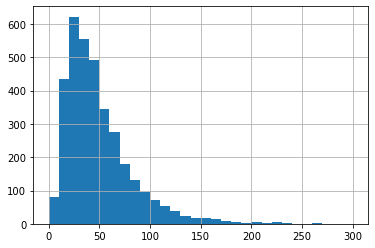

In [43]:
#check the distribution before discretizing. Note that there are a couple outliers >300.
merge_final.Count311.hist(bins=30,range=[0, 300])

In [44]:
merge_final.Count311.describe()

count    3481.000000
mean       48.743177
std        35.505983
min         3.000000
25%        25.000000
50%        40.000000
75%        62.000000
max       756.000000
Name: Count311, dtype: float64

In [45]:
#3 quantile binning results in <30, 30-53, >53. I think this is ok to consider low, medium, high
pd.qcut(merge_final.Count311,3)

0        (30.0, 53.0]
1        (30.0, 53.0]
2        (30.0, 53.0]
3       (53.0, 756.0]
4       (53.0, 756.0]
            ...      
3476    (53.0, 756.0]
3477    (53.0, 756.0]
3478    (53.0, 756.0]
3479    (53.0, 756.0]
3480    (53.0, 756.0]
Name: Count311, Length: 3481, dtype: category
Categories (3, interval[float64, right]): [(2.999, 30.0] < (30.0, 53.0] < (53.0, 756.0]]

In [46]:
merge_final['dirty_level'] = pd.qcut(merge_final.Count311,3,labels=[1,2,3])

In [47]:
# reorder columns
merge_final = merge_final[['CD', 'Year', 'Month', 'dirty_level','Count311','REFUSETONSCOLLECTED', 'PAPERTONSCOLLECTED',
       'MGPTONSCOLLECTED', 'RESORGANICSTONS', 'fs_openhours', 'fs_open',
       'trs_permits', 'paper_baskets', 'mgp_baskets',
       'total_number_of_households', 'hh_compost_num', 'hh_compost_percent',
       'shape_area', 'wfr_avg_recycling', 'wfr_avg_refuse', 'wfr_avg_bulk',
       'bigbelly', 'seasonal_wire_litter_basket', 'highend_basket',
       'publicspacereceptacle', 'wire_basket', 'total_litter_baskets',
       'pct_bach_deg', 'over65_rate', 'under18_rate',
       'pct_white_nh', 'poverty_rate', 'pct_hh_rent_burd', 'mean_commute',
       'unemployment', 'crime_per_1000', 'pop_density', 'numbldgs',
       'unitstotal', 'asland_sqft', 'pct_clean_strts',
       'pct_lot_area_open_space', 'pct_lot_area_public_facility_institution',
       'pct_lot_area_res_1_2_family_bldg',
       'pct_lot_area_res_multifamily_walkup', 'restaurant', 'business']]

In [48]:
merge_final.head()

,CD,Year,Month,dirty_level,Count311,REFUSETONSCOLLECTED,PAPERTONSCOLLECTED,MGPTONSCOLLECTED,RESORGANICSTONS,fs_openhours,fs_open,trs_permits,paper_baskets,mgp_baskets,total_number_of_households,hh_compost_num,hh_compost_percent,shape_area,wfr_avg_recycling,wfr_avg_refuse,wfr_avg_bulk,bigbelly,seasonal_wire_litter_basket,highend_basket,publicspacereceptacle,wire_basket,total_litter_baskets,pct_bach_deg,over65_rate,under18_rate,pct_white_nh,poverty_rate,pct_hh_rent_burd,mean_commute,unemployment,crime_per_1000,pop_density,numbldgs,unitstotal,asland_sqft,pct_clean_strts,pct_lot_area_open_space,pct_lot_area_public_facility_institution,pct_lot_area_res_1_2_family_bldg,pct_lot_area_res_multifamily_walkup,restaurant,business
0,BK01,2016,11,2,50,5250.4,527.8,402.8,16.9,333.25,6.0,14.0,9.0,9.0,92610,9745,0.105226,0.001307,1.0,3.0,3.0,1.0,0.0,2.0,1.0,10.0,14.0,47.0,9.3,24.0,61.3,15.4,40.7,34.3,4.0,10.9,36626.118079,17147,100971,10.78427,86.4,5.19,5.33,5.25,16.9,217,984
1,BK01,2016,12,2,36,5409.5,726.3,501.0,11.7,333.25,6.0,14.0,9.0,9.0,92610,9745,0.105226,0.001307,1.0,3.0,3.0,1.0,0.0,2.0,1.0,10.0,14.0,47.0,9.3,24.0,61.3,15.4,40.7,34.3,4.0,10.9,36626.118079,17147,100971,10.78427,86.4,5.19,5.33,5.25,16.9,217,915
2,BK01,2017,1,2,51,5189.9,589.1,455.2,14.9,333.25,6.0,14.0,9.0,9.0,92610,9745,0.105226,0.001307,1.0,3.0,3.0,1.0,0.0,2.0,1.0,10.0,14.0,47.0,9.3,24.0,61.3,15.4,40.7,34.3,4.0,10.9,36626.118079,17147,100971,10.78427,86.4,5.19,5.33,5.25,16.9,217,921
3,BK01,2017,2,3,61,4705.4,505.6,395.8,10.5,333.25,6.0,14.0,9.0,9.0,92610,9745,0.105226,0.001307,1.0,3.0,3.0,1.0,0.0,2.0,1.0,10.0,14.0,47.0,9.3,24.0,61.3,15.4,40.7,34.3,4.0,10.9,36626.118079,17147,100971,10.78427,86.4,5.19,5.33,5.25,16.9,217,877
4,BK01,2017,3,3,67,5476.7,563.0,453.3,10.6,333.25,6.0,14.0,9.0,9.0,92610,9745,0.105226,0.001307,1.0,3.0,3.0,1.0,0.0,2.0,1.0,10.0,14.0,47.0,9.3,24.0,61.3,15.4,40.7,34.3,4.0,10.9,36626.118079,17147,100971,10.78427,86.4,5.19,5.33,5.25,16.9,217,886


In [49]:
merge_final.shape

(3481, 47)

## Export to CSV

In [50]:
merge_final.to_csv('final_data_3481.csv')